In [1]:
import cv2
import numpy as np
import time
import glob
import pandas as pd

In [2]:
new_im = np.load("C:/Users/deeks/Desktop/Adsoft/Kaggle/crowd-counting/images.npy")

In [3]:
label = pd.read_csv("C:/Users/deeks/Desktop/Adsoft/Kaggle/crowd-counting/labels.csv")
#label = label.iloc[:,1]

In [28]:
#images = []
#array = []
#files = glob.glob("C:/Users/deeks/Desktop/Adsoft/Kaggle/crowd-counting/frames/*.jpg")
#for file in files:
    #img = cv2.imread(file)
    #images.append(img)
#a = np.array(images,dtype = 'uint8')


Feature Evaluation

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   9.,  14.,
         38.,  27.,  61., 123.,  58., 169., 102., 239., 130., 227., 111.,
        181.,  81., 124.,  39.,  95.,  68.,  27.,  42.,  15.,  14.,   3.,
          0.,   1.,   0.,   0.,   0.,   0.]),
 array([ 0.        ,  1.53846154,  3.07692308,  4.61538462,  6.15384615,
         7.69230769,  9.23076923, 10.76923077, 12.30769231, 13.84615385,
        15.38461538, 16.92307692, 18.46153846, 20.        , 21.53846154,
        23.07692308, 24.61538462, 26.15384615, 27.69230769, 29.23076923,
        30.76923077, 32.30769231, 33.84615385, 35.38461538, 36.92307692,
        38.46153846, 40.        , 41.53846154, 43.07692308, 44.61538462,
        46.15384615, 47.69230769, 49.23076923, 50.76923077, 52.30769231,
        53.84615385, 55.38461538, 56.92307692, 58.46153846, 60.        ]),
 <a list of 39 Patch objects>)

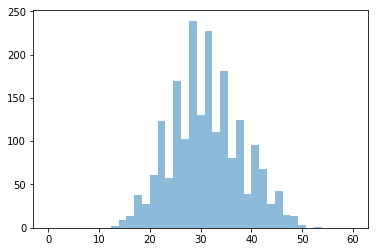

In [4]:
from matplotlib import pyplot
%matplotlib inline
bins = np.linspace(0,60,40)
pyplot.hist(label.iloc[:,1],bins,alpha = 0.5,label = "people count")

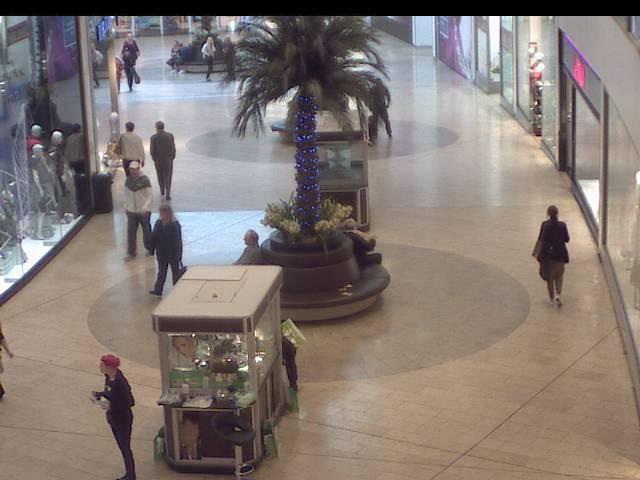

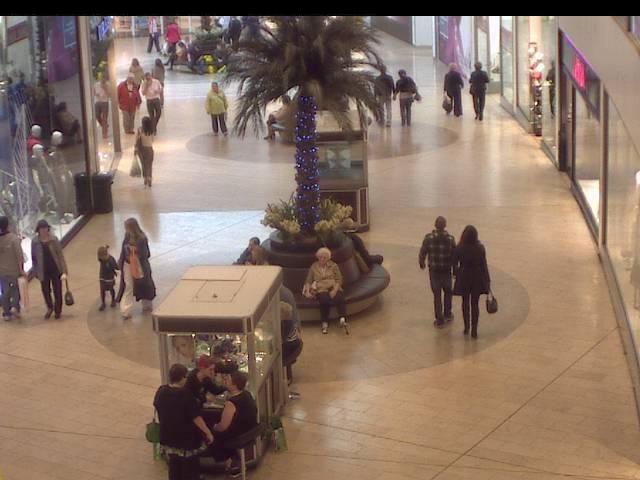

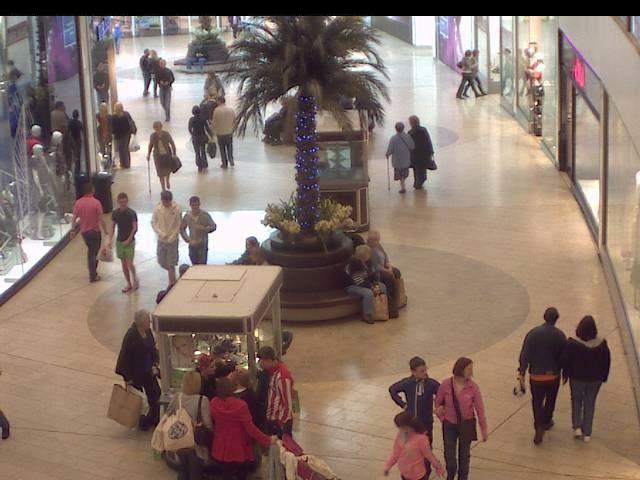

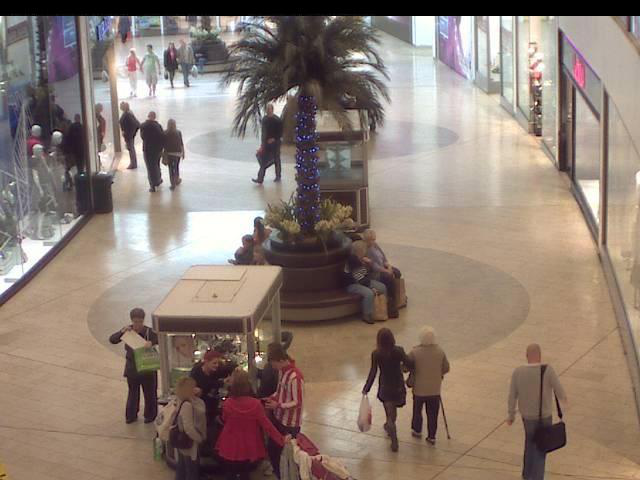

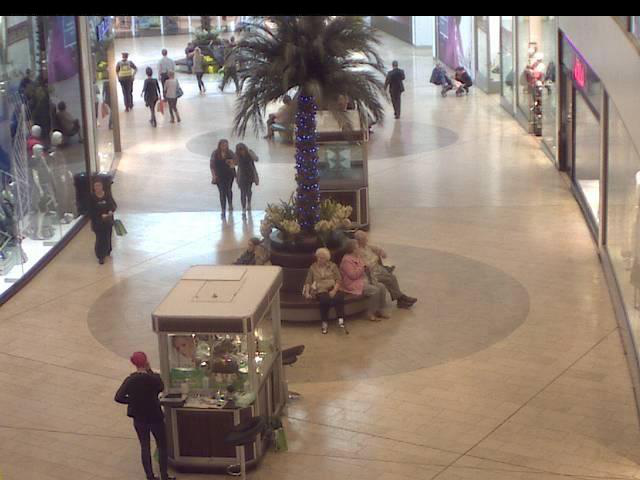

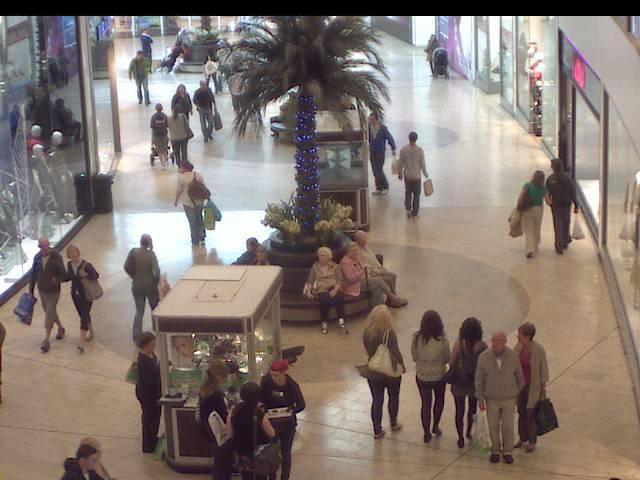

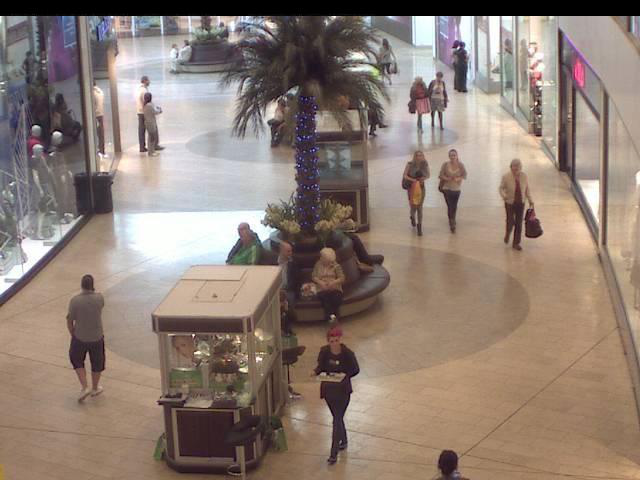

In [5]:
from PIL import Image
l = [10,200,1000,1050,1500,1735,1999]
for i in l:
    imd = Image.fromarray(new_im[i])
    display(imd)

In [6]:
label = label.iloc[:,1]

In [7]:
indices = np.random.permutation(len(new_im))

images_train, images_test = new_im[indices[:int(len(new_im)*0.8)]], new_im[indices[int(len(new_im)*0.8):]]

labels_train, labels_test = label[indices[:int(len(new_im)*0.8)]], label[indices[int(len(new_im)*0.8):]]

In [12]:
import tensorflow as tf
from keras.models import Sequential


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same",input_shape=(480, 640, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

model.fit(images_train, labels_train, epochs=30, batch_size = 32, validation_split = 0.2, shuffle=True)



Train on 1280 samples, validate on 320 samples
Epoch 1/30
1280/1280 [==============================] - 549s 429ms/step - loss: 304815.8121 - mean_squared_error: 304815.8121 - mean_absolute_error: 318.5459 - mean_absolute_percentage_error: 1100.1415 - val_loss: 119.8746 - val_mean_squared_error: 119.8746 - val_mean_absolute_error: 8.8688 - val_mean_absolute_percentage_error: 30.7192
Epoch 2/30
1280/1280 [==============================] - 572s 447ms/step - loss: 2136.6538 - mean_squared_error: 2136.6538 - mean_absolute_error: 34.4275 - mean_absolute_percentage_error: 115.3082 - val_loss: 305.9450 - val_mean_squared_error: 305.9450 - val_mean_absolute_error: 15.2318 - val_mean_absolute_percentage_error: 45.3032
Epoch 3/30
1280/1280 [==============================] - 605s 473ms/step - loss: 653.4106 - mean_squared_error: 653.4106 - mean_absolute_error: 20.1021 - mean_absolute_percentage_error: 67.0546 - val_loss: 498.1885 - val_mean_squared_error: 498.1885 - val_mean_absolute_error: 20.584

Epoch 26/30
1280/1280 [==============================] - 567s 443ms/step - loss: 85.4531 - mean_squared_error: 85.4531 - mean_absolute_error: 7.2886 - mean_absolute_percentage_error: 23.8001 - val_loss: 134.8631 - val_mean_squared_error: 134.8631 - val_mean_absolute_error: 10.4624 - val_mean_absolute_percentage_error: 31.7628
Epoch 27/30
1280/1280 [==============================] - 584s 456ms/step - loss: 86.3342 - mean_squared_error: 86.3342 - mean_absolute_error: 7.3700 - mean_absolute_percentage_error: 24.0871 - val_loss: 229.0559 - val_mean_squared_error: 229.0559 - val_mean_absolute_error: 14.3745 - val_mean_absolute_percentage_error: 45.2756
Epoch 28/30
1280/1280 [==============================] - 576s 450ms/step - loss: 81.8637 - mean_squared_error: 81.8637 - mean_absolute_error: 7.2362 - mean_absolute_percentage_error: 23.7864 - val_loss: 126.2322 - val_mean_squared_error: 126.2322 - val_mean_absolute_error: 9.9143 - val_mean_absolute_percentage_error: 29.7483
Epoch 29/30
1280/

In [13]:
y_pred = model.predict(images_test)


In [76]:
pdfy = pd.DataFrame(np.rint(y_pred).astype('int'))



In [77]:
from sklearn.metrics import classification_report
labels_pred = pd.DataFrame(np.rint(y_pred).astype('int')).iloc[:,1]
print(classification_report(labels_test, v))